# Library

In [1]:
from __future__ import print_function

import tensorflow as tf
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#session = tf.Session(config=config)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf
"""
# Set CPU as available physical device
my_devices = tf.config.experimental.list_physical_devices(device_type='CPU')
tf.config.experimental.set_visible_devices(devices= my_devices, device_type='CPU')

# To find out which devices your operations and tensors are assigned to
tf.debugging.set_log_device_placement(True)

"""

tf.config.experimental.set_visible_devices([], 'GPU')
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)



import tensorflow.keras as keras
from keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten,TimeDistributed
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.keras import layers,models
import h5py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import heapq
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import random
import h5py
import os
import matplotlib.pyplot as plt


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16149544544619705848
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2574899169008681931
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 429737870218072211
physical_device_desc: "device: XLA_GPU device"
]


Using TensorFlow backend.


## 1.Load and display data from h5 file






### download data from google drive

## 1A) Train on MNIST Fashion

In [36]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # customary normalization to [0, 1]

# because we're using CNNs, the data needs a channel dimension:
X_train = X_train[..., None]
X_test = X_test[..., None]

# Because of the slow trainin time I only use 700 samples

X_train = X_train[1:601,...]
X_test = X_test[1:101,...]
y_train = y_train[1:601,...]
y_test = y_test[1:101,...]


num_classes = np.max(y_train)+1;

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



IMG_SHAPE = (28, 28, 1)

img_input = tf.keras.layers.Input(shape=IMG_SHAPE)

x = tf.keras.layers.Conv2D(32, (3,3),
                           activation = 'relu',
                           padding = 'same',
                           name = 'block1_conv1') (img_input)
x = tf.keras.layers.Conv2D(32, (3,3),
                           activation = 'relu',
                           padding = 'same',
                           name = 'block1_conv2') (x) 
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x) 
x = tf.keras.layers.Conv2D(64, (3,3),
                           activation = 'relu',
                           padding = 'same',
                           name = 'block2_conv1') (x)
x = tf.keras.layers.Conv2D(64, (3,3),
                           activation = 'relu',
                           padding = 'same',
                           name = 'block2_conv2') (x) 
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)      
x = tf.keras.layers.BatchNormalization() (x)
x = tf.keras.layers.Flatten() (x)
x = tf.keras.layers.Dense(units=256, activation='relu', name='fc1') (x)
x = tf.keras.layers.Dense(units=128, activation='relu', name='fc2') (x)
x = tf.keras.layers.Dense(10, activation='softmax', name='fc3') (x) 

model = tf.keras.models.Model(img_input, x)


In [37]:
model.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 32)        320       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 14, 14, 64)        18496     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 64)        36928     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 64)          0  

# Define loss function and optimizer

In [38]:

loss_object = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


# Define loss function for AM part

In [39]:
def am_loss(y_true, y_predict):
    
    
  return tf.math.abs(tf.reduce_sum(tf.math.multiply(y_true, y_predict)))/y_predict.shape[0]


# Load the train weight

In [5]:
save_dir = "./"


weights_dir = save_dir + "weights_GAIN_correct.h5"

model_dir_current = weights_dir

model.load_weights(weights_dir)

# Show training for 50 epoch notice that the loss from AM is not improved

In [41]:
loss

<tf.Tensor: shape=(397,), dtype=float32, numpy=
array([0.3256646 , 0.23886888, 0.41451073, 0.3972565 , 0.26739   ,
       0.3358704 , 0.18935408, 0.6026146 , 0.2351555 , 0.37654084,
       0.41401762, 0.5595526 , 0.2665834 , 0.19124739, 0.27494466,
       0.13808264, 0.29015297, 0.29286698, 0.15993626, 0.19351126,
       0.26358467, 0.32045305, 0.19915654, 0.34875152, 0.20643528,
       0.2811754 , 0.31052083, 0.20888542, 0.22676475, 0.16352892,
       0.15821555, 0.13505802, 0.22677618, 0.15197864, 0.45244694,
       0.33136857, 0.2614528 , 0.30297667, 0.5457183 , 0.27949116,
       0.5735022 , 0.24136618, 0.44242835, 0.282328  , 0.1670063 ,
       0.2170294 , 0.3807304 , 0.32482368, 0.38339698, 0.42984477,
       0.15211973, 0.19844393, 0.16663364, 0.23378246, 0.38170108,
       0.28778216, 0.44809705, 0.16847149, 0.3208882 , 0.2191391 ,
       0.22589254, 0.2689545 , 0.20890811, 0.21887401, 0.21572189,
       0.4762627 , 0.20586365, 0.4380572 , 0.17330918, 0.3518888 ,
       0.45053

In [42]:
## Note: Rerunning this cell uses the same model variables

from tensorflow.keras.models import Model

layerName = "block2_conv2"

gradModel_cl = Model(
    inputs=[model.inputs],
    outputs=[model.get_layer(layerName).output,
        model.output])


gradModel_am = Model(
    inputs=[model.inputs],
    outputs=[model.get_layer(layerName).output,
        model.output])



# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

batch_size = 100;
num_epochs = 50;
num_classes =10;
for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.CategoricalAccuracy()

    # Training loop - using batches of 32
    for i in range(len(X_train)//100):
    #for i in range(1):
        x = X_train[i:(i+1)*100,...].astype(np.float32)
        y = y_train[i:(i+1)*100,...].astype(np.float32)
        
        x = tf.convert_to_tensor(x, np.float32)

        # Optimize the model
        
                # Optimize the model
            
        with tf.GradientTape(persistent=True) as tape_0:
            with tf.GradientTape(persistent=True) as tape:
                tape.watch(x)

                (convOutputs, y_pred_cl) = gradModel_cl(x,training = True)
                #loss_value = loss_object(y, y_pred)
                loss_value_cl = loss_object(y, y_pred_cl)



                
                loss = tf.math.reduce_max(y_pred_cl,axis = 1);

                #****************************
                grads = tape.gradient(loss, convOutputs)

                castConvOutputs = tf.cast(convOutputs > 0, "float32")
                castGrads = tf.cast(grads > 0, "float32")
                guidedGrads = grads;

                weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
                cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

                castcam = tf.cast(cam > 0, "float32");

                cam = castcam*cam;

                cam = tf.reshape(cam,(cam.shape[1],cam.shape[2],cam.shape[0]))



                heatmap = tf.image.resize(cam, [28,28])



                heatmap = tf.reshape(heatmap,(heatmap.shape[2],heatmap.shape[0],heatmap.shape[1],1))


                current_min = tf.reduce_min(heatmap)
                current_max = tf.reduce_max(heatmap)

                heatmap = (heatmap - current_min + tf.keras.backend.epsilon()) / (current_max - current_min + tf.keras.backend.epsilon())

                prob_heatmap = tf.math.sigmoid(tf.math.multiply(8, heatmap))

                x_cut = x - tf.math.multiply(x, prob_heatmap)


                (convOutputs_am, y_pred_am) = gradModel_am(x_cut,training = True)


                loss_value_am = am_loss(y, y_pred_am)
                    
                      







        
        loss_value = loss_value_cl + loss_value_am;
        
        grads_cl = tape_0.gradient(loss_value_cl, model.trainable_variables)
        
        #optimizer.apply_gradients(zip(grads_cl, model.trainable_variables))
        
        grads_am = tape_0.gradient(loss_value_am, model.trainable_variables)
        
        optimizer.apply_gradients(zip(grads_am , model.trainable_variables))
        optimizer.apply_gradients(zip(grads_cl , model.trainable_variables))

        # Track progress
        epoch_loss_avg.update_state(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        # training=True is needed only if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        epoch_accuracy.update_state(y, model(x, training=True))
        
        print(loss_value_cl)
        print(loss_value_am)

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 1 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))


tf.Tensor(1.4607223, shape=(), dtype=float32)
tf.Tensor(0.16172898, shape=(), dtype=float32)
tf.Tensor(1.206958, shape=(), dtype=float32)
tf.Tensor(0.20275201, shape=(), dtype=float32)
tf.Tensor(1.0086884, shape=(), dtype=float32)
tf.Tensor(0.2568503, shape=(), dtype=float32)
tf.Tensor(1.0101936, shape=(), dtype=float32)
tf.Tensor(0.33850205, shape=(), dtype=float32)
tf.Tensor(0.8470994, shape=(), dtype=float32)
tf.Tensor(0.33560637, shape=(), dtype=float32)
tf.Tensor(0.79102975, shape=(), dtype=float32)
tf.Tensor(0.3062053, shape=(), dtype=float32)
Epoch 000: Loss: 1.321, Accuracy: 66.235%
tf.Tensor(0.79872304, shape=(), dtype=float32)
tf.Tensor(0.26520357, shape=(), dtype=float32)
tf.Tensor(0.7905504, shape=(), dtype=float32)
tf.Tensor(0.22137456, shape=(), dtype=float32)
tf.Tensor(0.7582008, shape=(), dtype=float32)
tf.Tensor(0.15932764, shape=(), dtype=float32)
tf.Tensor(0.77804965, shape=(), dtype=float32)
tf.Tensor(0.14185283, shape=(), dtype=float32)
tf.Tensor(0.75244474, shape=

tf.Tensor(0.0037368794, shape=(), dtype=float32)
tf.Tensor(0.009020427, shape=(), dtype=float32)
tf.Tensor(0.004668962, shape=(), dtype=float32)
tf.Tensor(0.0010052654, shape=(), dtype=float32)
tf.Tensor(0.009025196, shape=(), dtype=float32)
tf.Tensor(0.0018580133, shape=(), dtype=float32)
tf.Tensor(0.023002118, shape=(), dtype=float32)
tf.Tensor(0.0030696788, shape=(), dtype=float32)
tf.Tensor(0.033456057, shape=(), dtype=float32)
tf.Tensor(0.0031862827, shape=(), dtype=float32)
tf.Tensor(0.05578463, shape=(), dtype=float32)
tf.Tensor(0.0015938854, shape=(), dtype=float32)
Epoch 013: Loss: 0.025, Accuracy: 99.568%
tf.Tensor(0.0023321481, shape=(), dtype=float32)
tf.Tensor(0.0003426871, shape=(), dtype=float32)
tf.Tensor(0.0023657284, shape=(), dtype=float32)
tf.Tensor(0.00096966175, shape=(), dtype=float32)
tf.Tensor(0.005524245, shape=(), dtype=float32)
tf.Tensor(0.011992207, shape=(), dtype=float32)
tf.Tensor(0.020831522, shape=(), dtype=float32)
tf.Tensor(0.0027611267, shape=(), dt

tf.Tensor(0.002982311, shape=(), dtype=float32)
tf.Tensor(0.002654709, shape=(), dtype=float32)
tf.Tensor(0.0013317754, shape=(), dtype=float32)
tf.Tensor(0.00020359659, shape=(), dtype=float32)
tf.Tensor(0.0010699104, shape=(), dtype=float32)
tf.Tensor(0.0005342376, shape=(), dtype=float32)
tf.Tensor(0.0014717263, shape=(), dtype=float32)
tf.Tensor(0.00030772196, shape=(), dtype=float32)
tf.Tensor(0.0023899167, shape=(), dtype=float32)
tf.Tensor(0.00046072798, shape=(), dtype=float32)
tf.Tensor(0.018556854, shape=(), dtype=float32)
tf.Tensor(0.0007018754, shape=(), dtype=float32)
Epoch 026: Loss: 0.005, Accuracy: 99.904%
tf.Tensor(0.0007273813, shape=(), dtype=float32)
tf.Tensor(5.935911e-05, shape=(), dtype=float32)
tf.Tensor(0.0010462329, shape=(), dtype=float32)
tf.Tensor(6.7561305e-05, shape=(), dtype=float32)
tf.Tensor(0.0010991888, shape=(), dtype=float32)
tf.Tensor(0.00010948463, shape=(), dtype=float32)
tf.Tensor(0.0012437761, shape=(), dtype=float32)
tf.Tensor(0.00032084063, 

tf.Tensor(9.8577875e-05, shape=(), dtype=float32)
tf.Tensor(8.004455e-06, shape=(), dtype=float32)
tf.Tensor(0.00014138865, shape=(), dtype=float32)
tf.Tensor(2.395874e-05, shape=(), dtype=float32)
tf.Tensor(0.00017643024, shape=(), dtype=float32)
tf.Tensor(2.9074085e-05, shape=(), dtype=float32)
tf.Tensor(0.00023660998, shape=(), dtype=float32)
tf.Tensor(3.3063596e-05, shape=(), dtype=float32)
tf.Tensor(0.00031627883, shape=(), dtype=float32)
tf.Tensor(3.336991e-05, shape=(), dtype=float32)
tf.Tensor(0.00081602775, shape=(), dtype=float32)
tf.Tensor(6.820408e-05, shape=(), dtype=float32)
Epoch 039: Loss: 0.000, Accuracy: 100.000%
tf.Tensor(9.2211514e-05, shape=(), dtype=float32)
tf.Tensor(7.528335e-06, shape=(), dtype=float32)
tf.Tensor(0.00013287642, shape=(), dtype=float32)
tf.Tensor(2.1971337e-05, shape=(), dtype=float32)
tf.Tensor(0.00016655982, shape=(), dtype=float32)
tf.Tensor(2.8540477e-05, shape=(), dtype=float32)
tf.Tensor(0.0002240179, shape=(), dtype=float32)
tf.Tensor(3.1

In [43]:
model.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 32)        320       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 14, 14, 64)        18496     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 64)        36928     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 64)          0  

# Show Grad cam and show using Grad cam to delete part of image

In [44]:
import cv2 

class GradCAM:
    def __init__(self, model, classIdx, layerName = None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()
    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        count = 0;
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            #print(len(layer.output_shape))
            
            if len(layer.output_shape) == 4 and count ==2:
                #print(layer.name)
                return layer.name
            
            if len(layer.output_shape) == 4:
                count = count+1;
            
            
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
    def compute_heatmap(self, image, eps=1e-8):
        from tensorflow.keras.models import Model
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,
                self.model.output])
        
        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)
        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = grads;

        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        
        castcam = tf.cast(cam > 0, "float32");
        
        cam = castcam*cam;
        
        cam = tf.reshape(cam,(cam.shape[1],cam.shape[2],cam.shape[0]))
    
        
        heatmap = tf.image.resize(cam, [28,28])
        
       

        heatmap = tf.reshape(heatmap,(heatmap.shape[2],heatmap.shape[0],heatmap.shape[1],1))
        
  


        current_min = tf.reduce_min(heatmap)
        current_max = tf.reduce_max(heatmap)

        heatmap = (heatmap - current_min +tf.keras.backend.epsilon()) / (current_max - current_min+tf.keras.backend.epsilon())
       
        return heatmap

    def cut_heatmap(self,heatmap,image,weight):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        
        #heatmap = cv2.applyColorMap(heatmap, colormap)
        prob_heatmap = tf.math.sigmoid(tf.math.multiply(weight, heatmap))
        
        output = image - tf.math.multiply(image, prob_heatmap)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return output

# Mimic the code from https://github.com/ngxbac/GAIN for masking the input

In [45]:
"""
	def get_mask(gcam, sigma=.5, w=8):
		gcam = (gcam - F.min(gcam).data)/(F.max(gcam) - F.min(gcam)).data
		mask = F.squeeze(F.sigmoid(w * (gcam - sigma)))
		return mask

	@staticmethod
	def mask_image(img, mask):
		broadcasted_mask = F.broadcast_to(mask, img.shape)
		to_subtract = img*broadcasted_mask
		return img - to_subtract
"""

'\n\tdef get_mask(gcam, sigma=.5, w=8):\n\t\tgcam = (gcam - F.min(gcam).data)/(F.max(gcam) - F.min(gcam)).data\n\t\tmask = F.squeeze(F.sigmoid(w * (gcam - sigma)))\n\t\treturn mask\n\n\t@staticmethod\n\tdef mask_image(img, mask):\n\t\tbroadcasted_mask = F.broadcast_to(mask, img.shape)\n\t\tto_subtract = img*broadcasted_mask\n\t\treturn img - to_subtract\n'

# Have found 2 thing from the experiment 
# The first case is that the image get delete to the point it can be recognized
# The second case is that the image totally erased

(1, 28, 28, 1)
1.0
Image predictions:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
real
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Cut Image predictions:  [[0.012 0.    0.    0.002 0.003 0.    0.024 0.927 0.032 0.   ]]


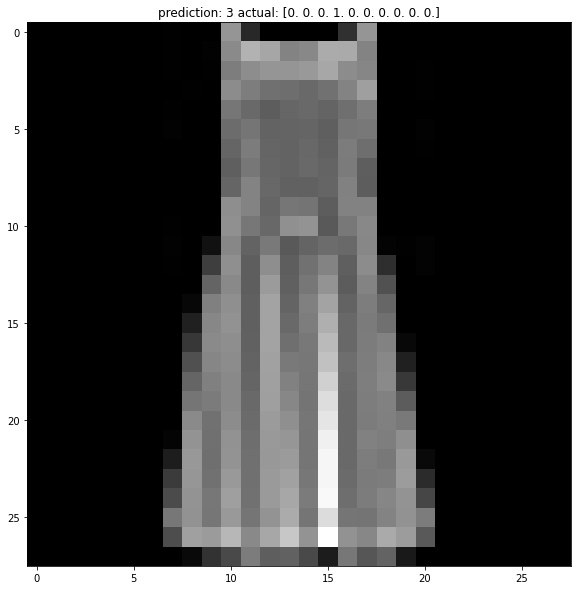

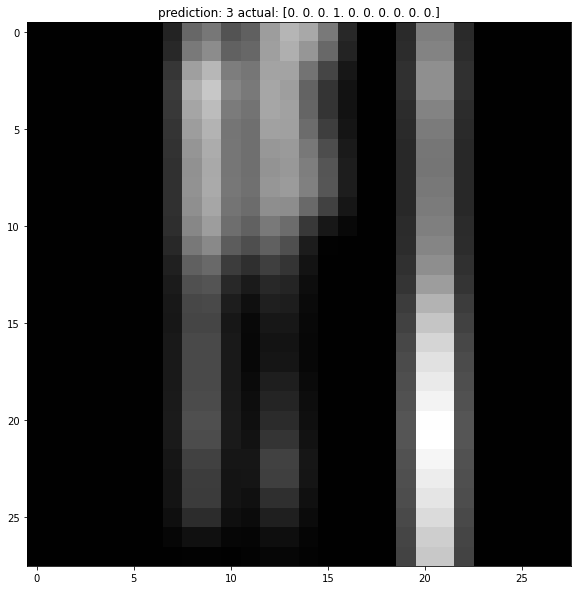

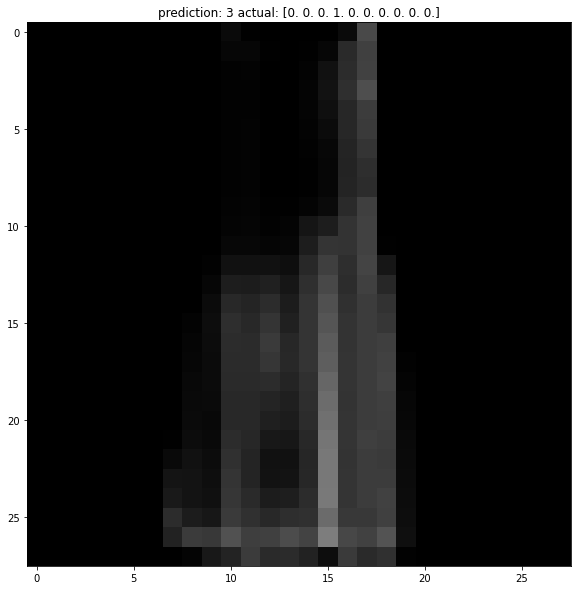

In [46]:

import imutils
def show_grad(model):



    model = model

    randi = random.randint(0,X_test.shape[0]-1)

    image = X_train[randi,:,:,:]
    label = y_train[randi]
    image = np.expand_dims(image,axis=0)
    orig = image.astype("float32")

    shape_ = image.shape
    preds = model.predict(image)

    
    i = np.argmax(preds[0])
    cam = GradCAM(model, i)

    heatmap = cam.compute_heatmap(image)
    #heatmap = cv2.resize(heatmap, (orig.shape[0], orig.shape[1]))

    output = cam.cut_heatmap(heatmap, orig, weight = 8)



    print(output.shape)
    # display the original image and resulting heatmap and output image
    # to our screen
    
    image = image[0,:,:,0]
    plt.figure(figsize=(20,10))
    plt.title("prediction: " + str(i) + " actual: " + str(label) )
    plt.imshow((image*255).astype('uint8'),'gray',vmin=0,vmax=255)
    
    
    
    
    heatmap = heatmap[0,:,:,0]
    heatmap = heatmap.numpy()
    plt.figure(figsize=(20,10))
    plt.title("prediction: " + str(i) + " actual: " + str(label) )
    plt.imshow((heatmap*255).astype('uint8'),'gray',vmin=0,vmax=255)
    
    output = output[0,:,:,0]
    output = output.numpy()
    plt.figure(figsize=(20,10))
    plt.title("prediction: " + str(i) + " actual: " + str(label) )
    plt.imshow((output*255).astype('uint8'),'gray',vmin=0,vmax=255)
    print(np.max(orig))
    print("Image predictions: ", preds.round(3))
    print('real')
    print(label)
    print("Cut Image predictions: ",model.predict(tf.reshape(output,shape_)).round(3))
show_grad(model)

(1, 28, 28, 1)
1.0
Image predictions:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
real
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Cut Image predictions:  [[0.003 0.017 0.056 0.002 0.513 0.008 0.205 0.072 0.122 0.001]]


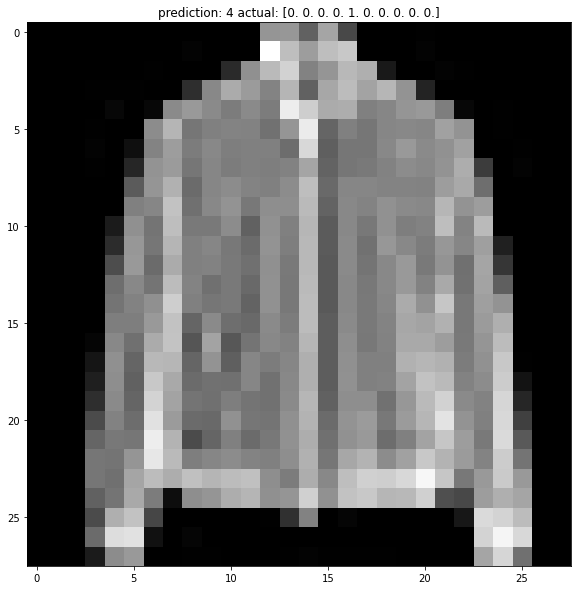

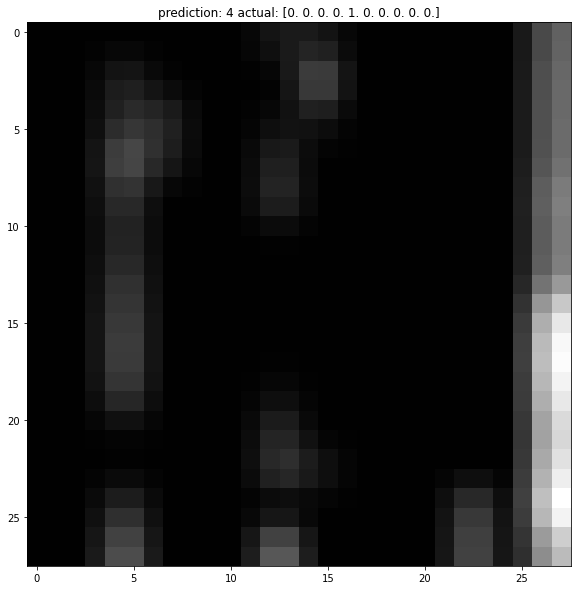

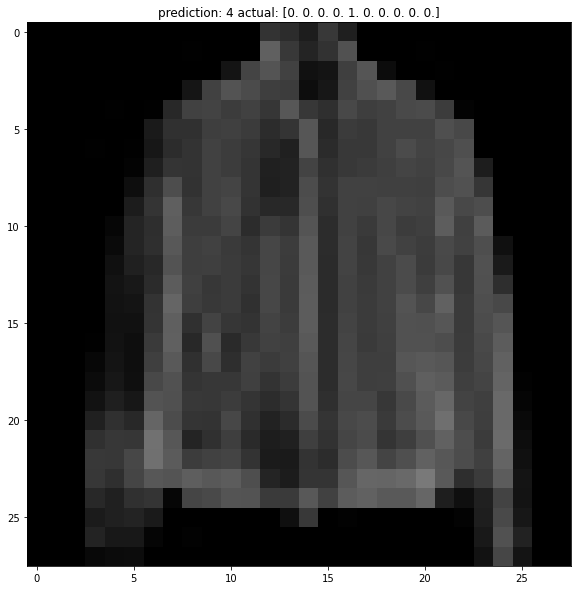

In [47]:
show_grad(model)

In [48]:
np.max(heatmap)

1.0

Image predictions:  [[9.9999678e-01 4.2626874e-12 1.2081049e-08 4.3849360e-07 3.6397084e-14
  2.4968317e-11 2.7342178e-06 6.0274924e-13 2.3996527e-09 2.5487643e-11]]
predict
0
real
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1, 28, 28, 1)
1.0
[[6.62736371e-02 1.16544084e-04 1.54860929e-04 8.44530819e-04
  2.48177996e-04 1.88765600e-02 2.41177244e-04 4.80396122e-01
  4.27069455e-01 5.77896554e-03]]


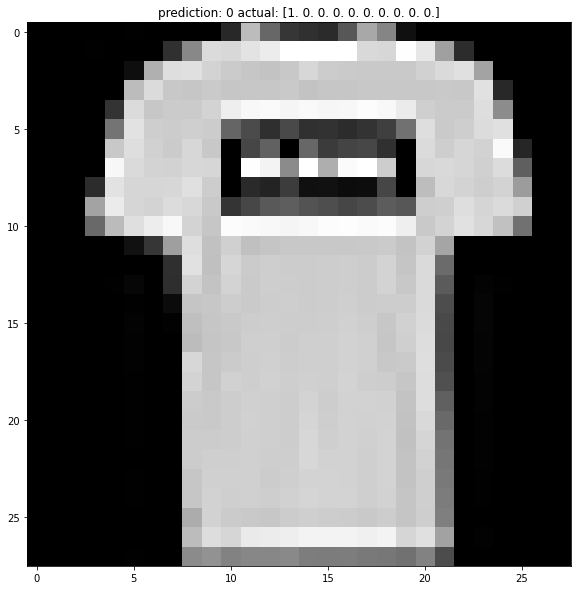

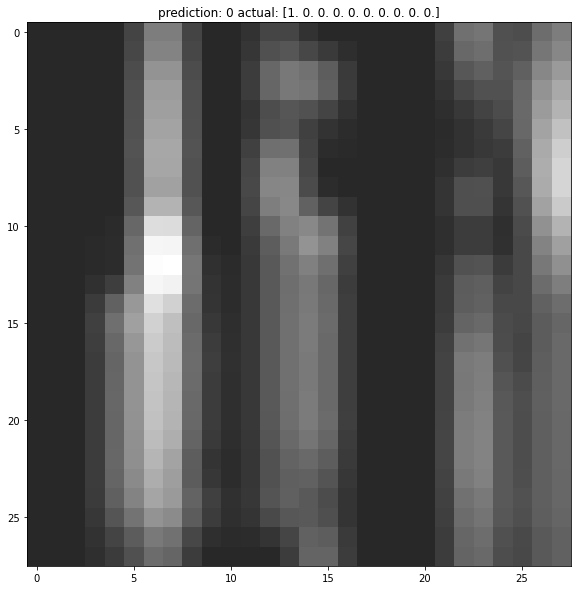

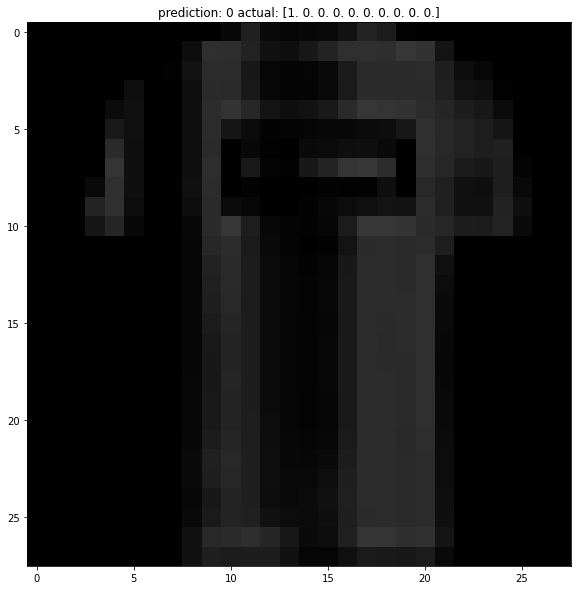

In [49]:
    model = model

    randi = random.randint(0,X_test.shape[0]-1)

    image = X_train[randi,:,:,:]
    label = y_train[randi]
    image = np.expand_dims(image,axis=0)
    orig = image.astype("float32")

    shape_ = image.shape
    preds = model.predict(image)

    print("Image predictions: ", preds)
    i = np.argmax(preds[0])
    cam = GradCAM(model, i)
    print('predict')
    print(i)
    print('real')
    print(label)
    heatmap = cam.compute_heatmap(image)
    #heatmap = cv2.resize(heatmap, (orig.shape[0], orig.shape[1]))

    output = cam.cut_heatmap(heatmap, orig, weight = 8)



    print(output.shape)
    # display the original image and resulting heatmap and output image
    # to our screen
    
    image = image[0,:,:,0]
    plt.figure(figsize=(20,10))
    plt.title("prediction: " + str(i) + " actual: " + str(label) )
    plt.imshow((image*255).astype('uint8'),'gray',vmin=0,vmax=255)
    
    
    
    
    heatmap = heatmap[0,:,:,0]
    heatmap = heatmap.numpy()
    plt.figure(figsize=(20,10))
    plt.title("prediction: " + str(i) + " actual: " + str(label) )
    plt.imshow((heatmap*255).astype('uint8'),'gray',vmin=0,vmax=255)
    
    output = output[0,:,:,0]
    output = output.numpy()
    plt.figure(figsize=(20,10))
    plt.title("prediction: " + str(i) + " actual: " + str(label) )
    plt.imshow((output*255).astype('uint8'),'gray',vmin=0,vmax=255)
    print(np.max(orig))
    
    print(model.predict(tf.reshape(output,shape_)))

(1, 28, 28, 1)
1.0
Image predictions:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
real
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Cut Image predictions:  [[0.001 0.033 0.    0.001 0.186 0.008 0.116 0.025 0.629 0.   ]]


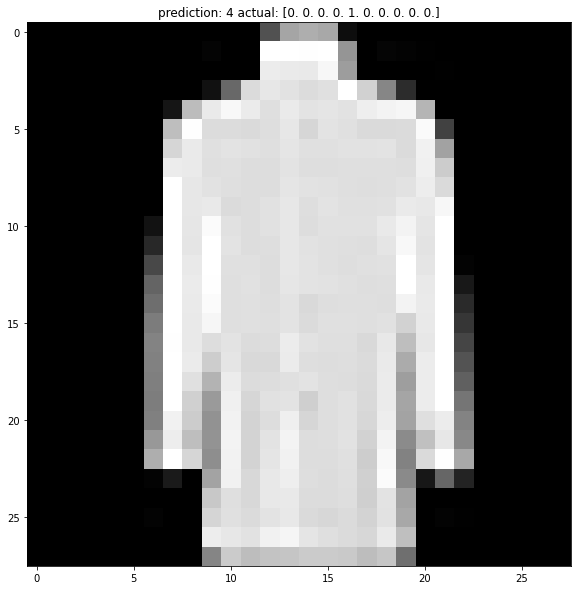

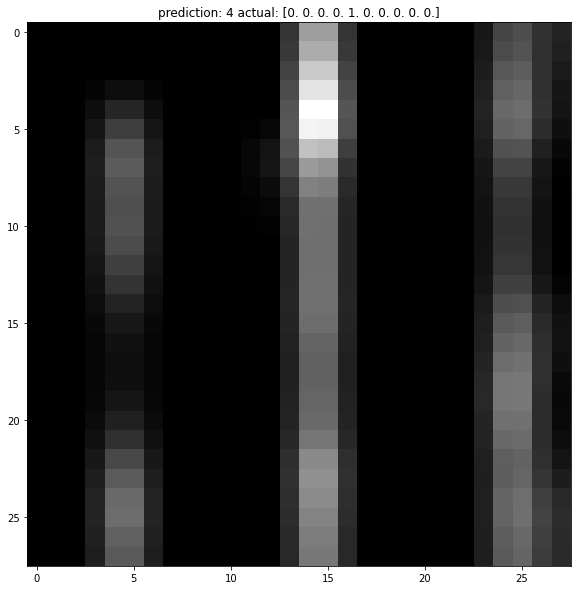

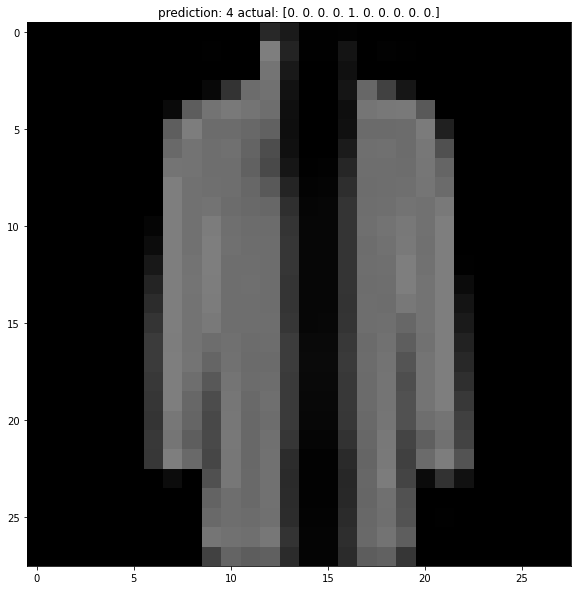

In [50]:
show_grad(model)

(1, 28, 28, 1)
0.99607843
Image predictions:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
real
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Cut Image predictions:  [[0.585 0.001 0.    0.034 0.002 0.121 0.011 0.192 0.044 0.009]]


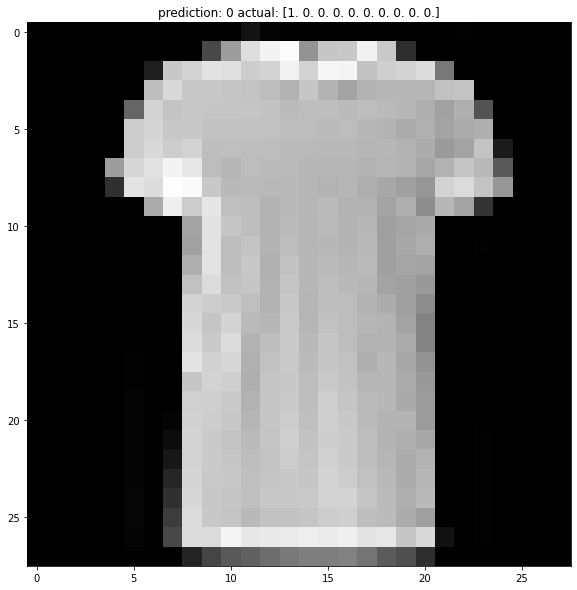

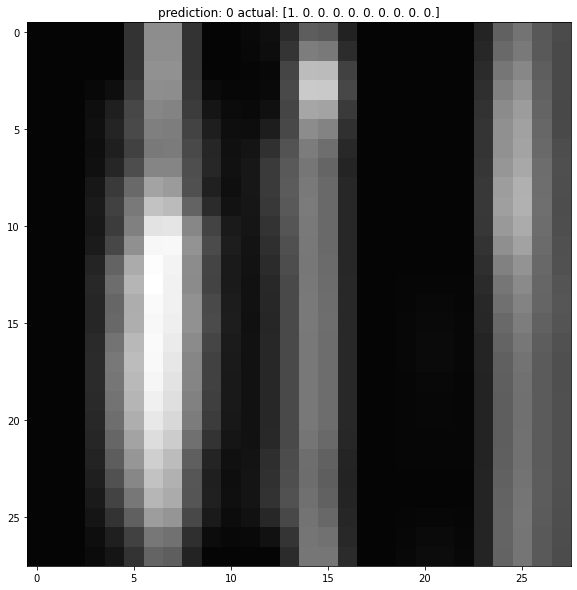

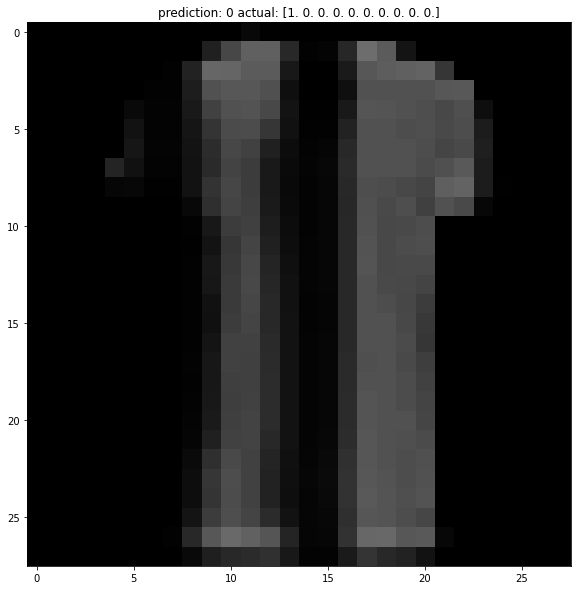

In [51]:
show_grad(model)

(1, 28, 28, 1)
1.0
Image predictions:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
real
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Cut Image predictions:  [[0.001 0.033 0.    0.001 0.186 0.008 0.116 0.025 0.629 0.   ]]


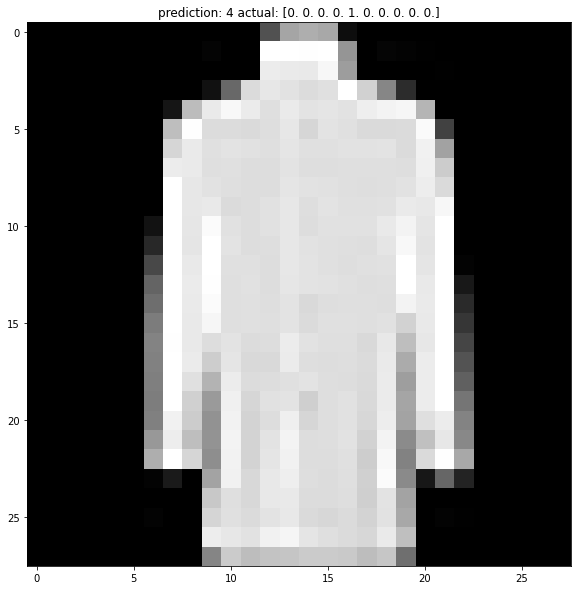

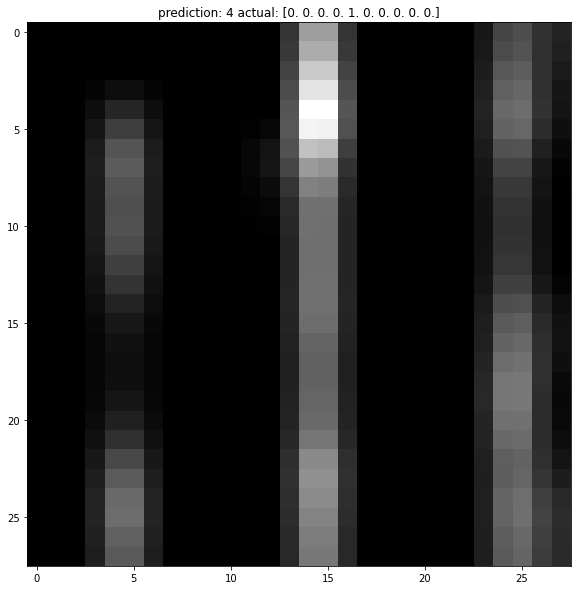

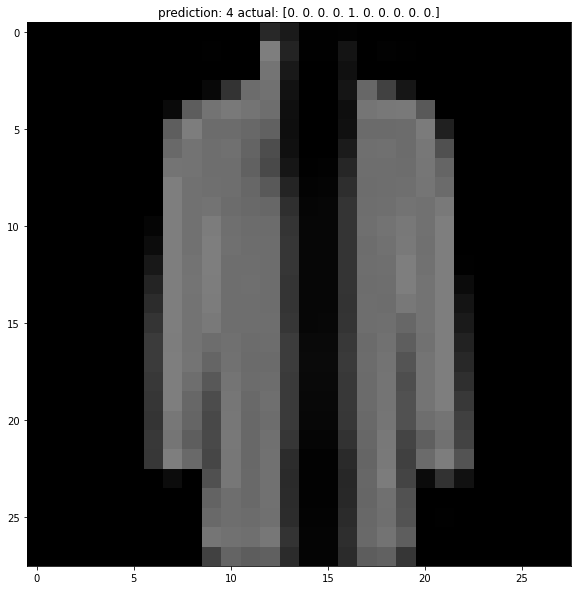

In [52]:
show_grad(model)

(1, 28, 28, 1)
1.0
Image predictions:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
real
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Cut Image predictions:  [[0.002 0.    0.    0.    0.    0.    0.001 0.026 0.971 0.   ]]


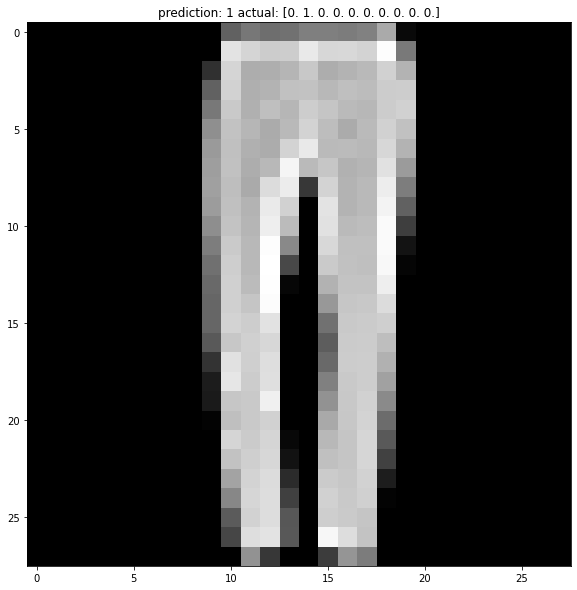

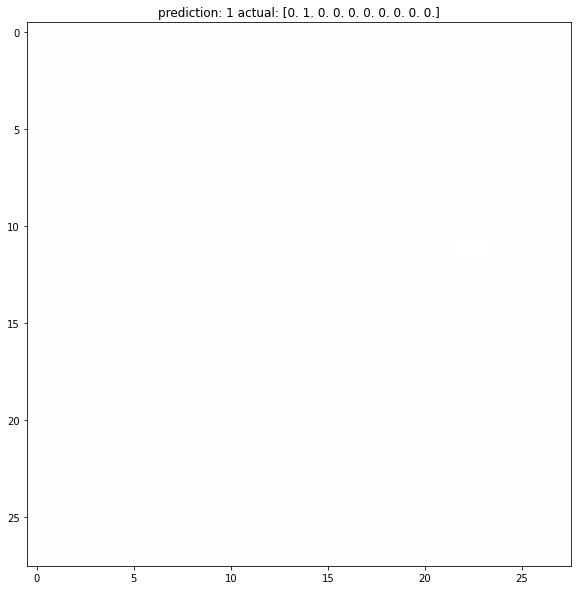

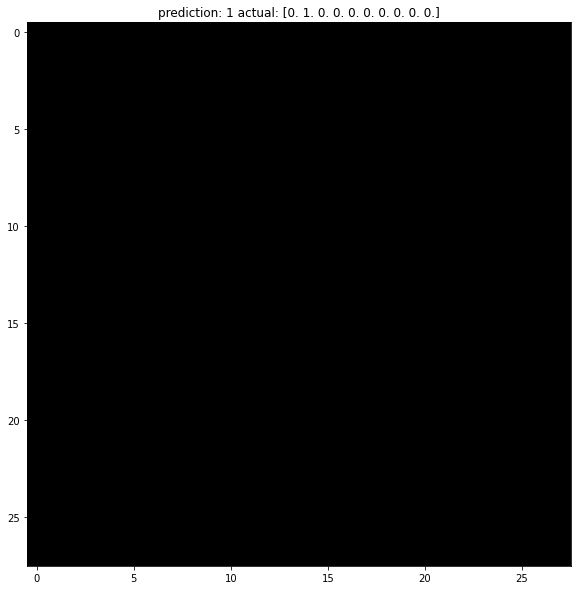

In [53]:
show_grad(model)

(1, 28, 28, 1)
1.0
Image predictions:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
real
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Cut Image predictions:  [[0.012 0.    0.    0.002 0.003 0.    0.024 0.927 0.032 0.   ]]


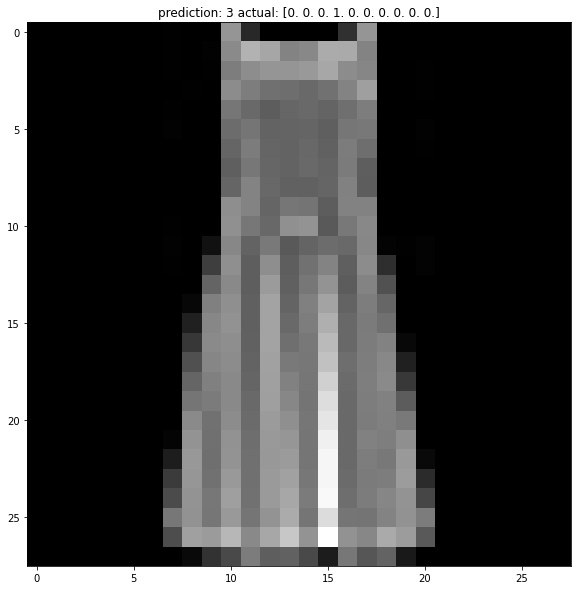

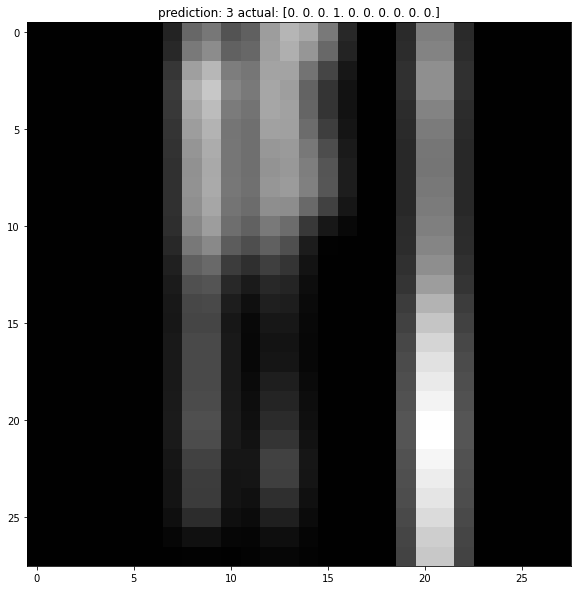

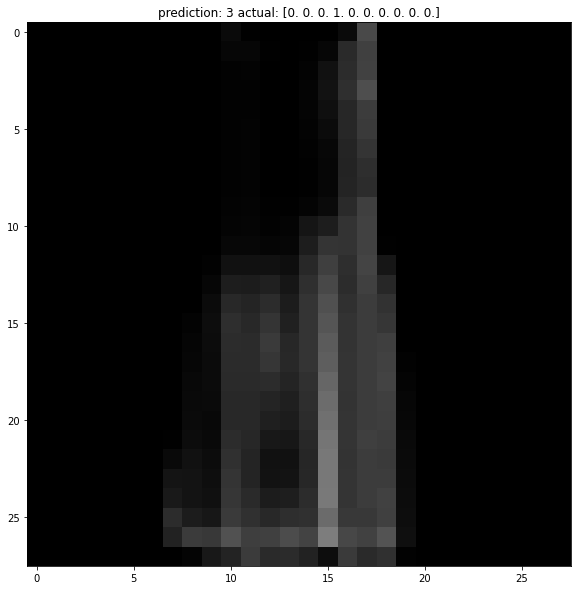

In [59]:
show_grad(model)

(1, 28, 28, 1)
0.99607843
Image predictions:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
real
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Cut Image predictions:  [[0.585 0.001 0.    0.034 0.002 0.121 0.011 0.192 0.044 0.009]]


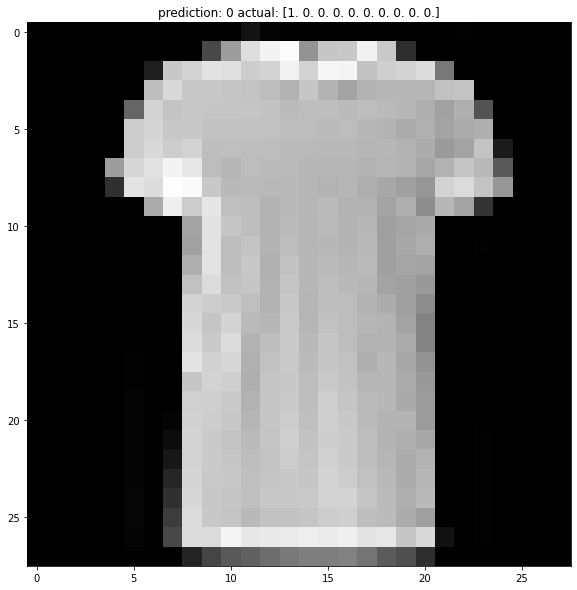

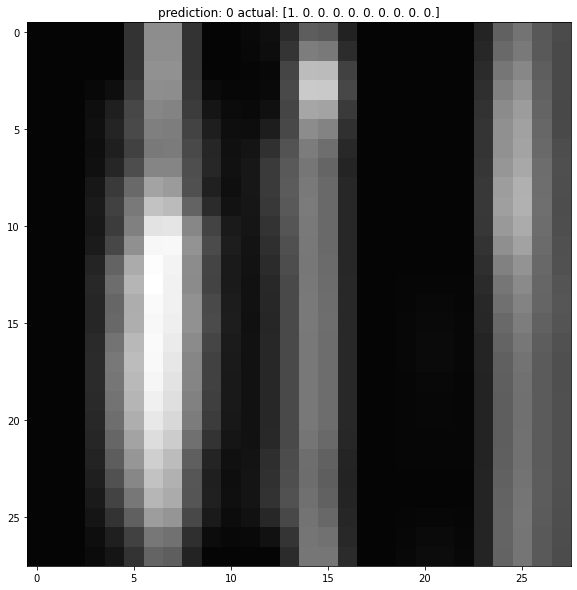

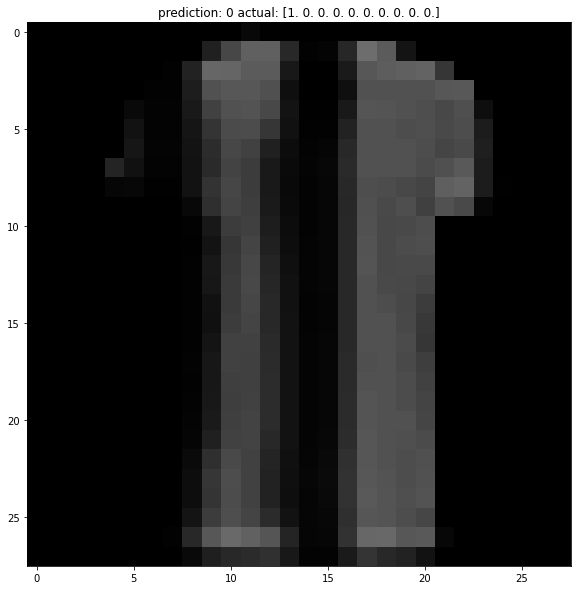

In [55]:
show_grad(model)

(1, 28, 28, 1)
0.99607843
Image predictions:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
real
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Cut Image predictions:  [[0.189 0.    0.    0.    0.001 0.001 0.418 0.003 0.387 0.001]]


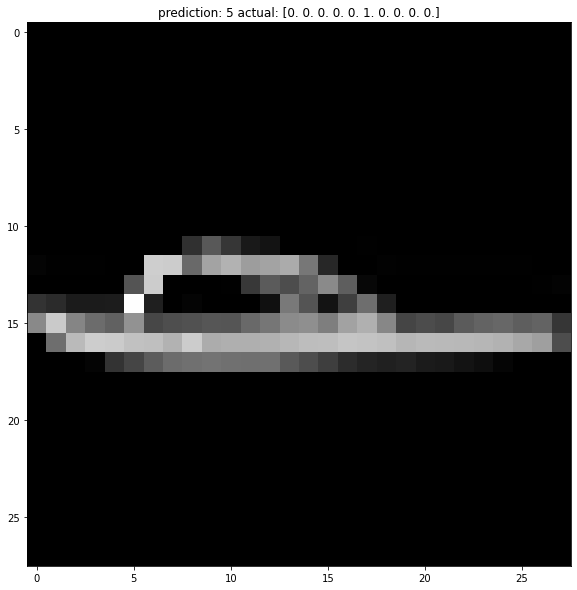

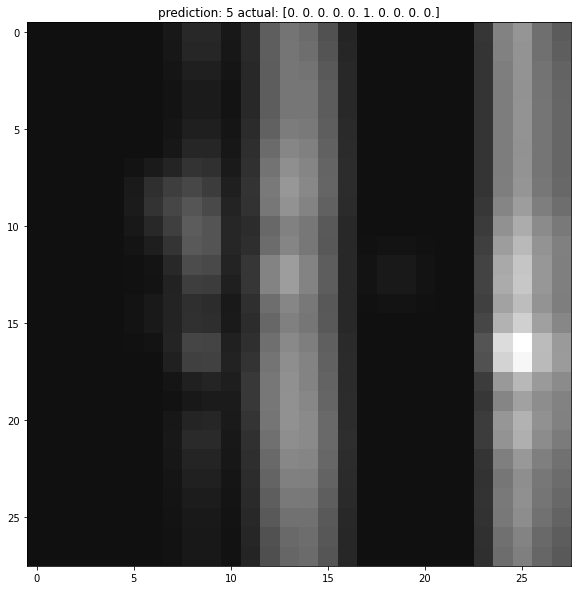

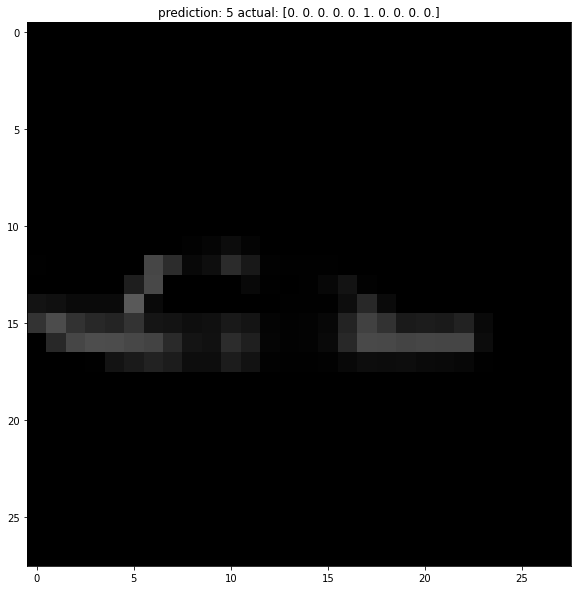

In [56]:
show_grad(model)

(1, 28, 28, 1)
1.0
Image predictions:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
real
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Cut Image predictions:  [[0.017 0.013 0.002 0.011 0.087 0.007 0.725 0.106 0.026 0.007]]


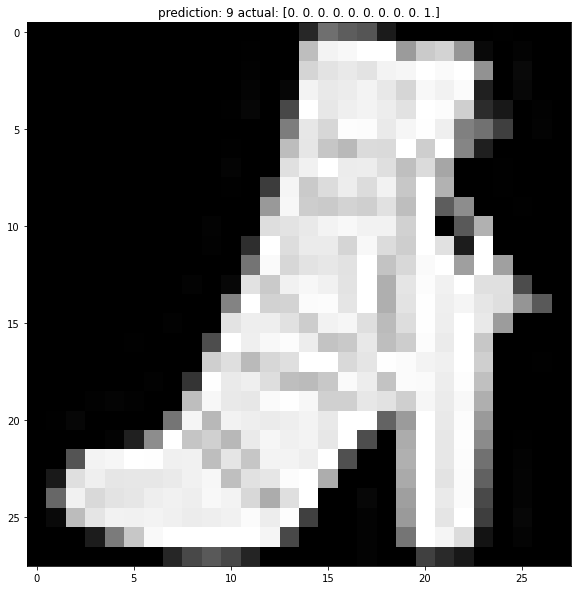

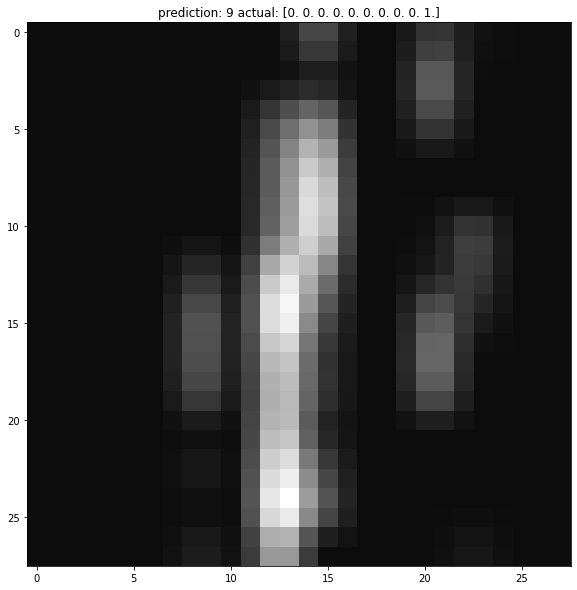

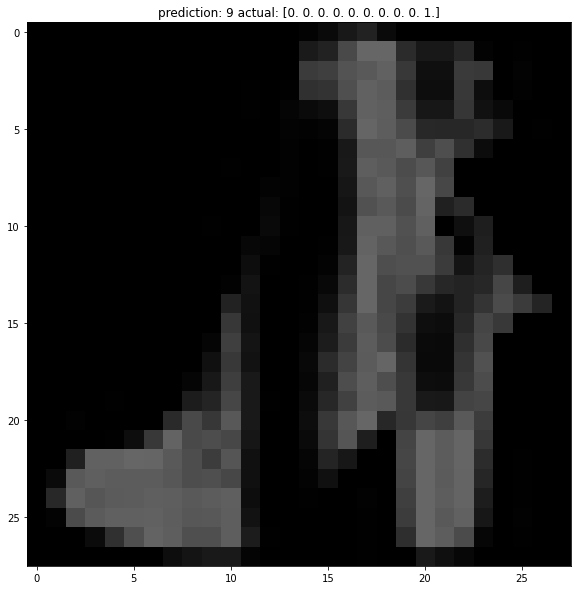

In [57]:
show_grad(model)

(1, 28, 28, 1)
1.0
Image predictions:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
real
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Cut Image predictions:  [[0.513 0.001 0.008 0.009 0.022 0.006 0.169 0.198 0.072 0.002]]


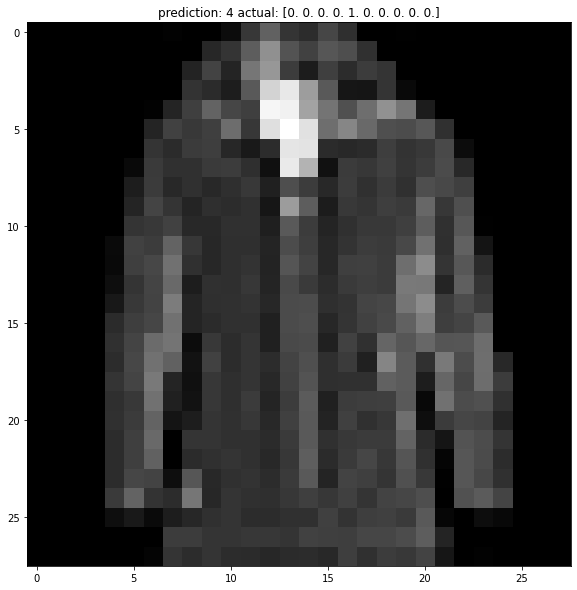

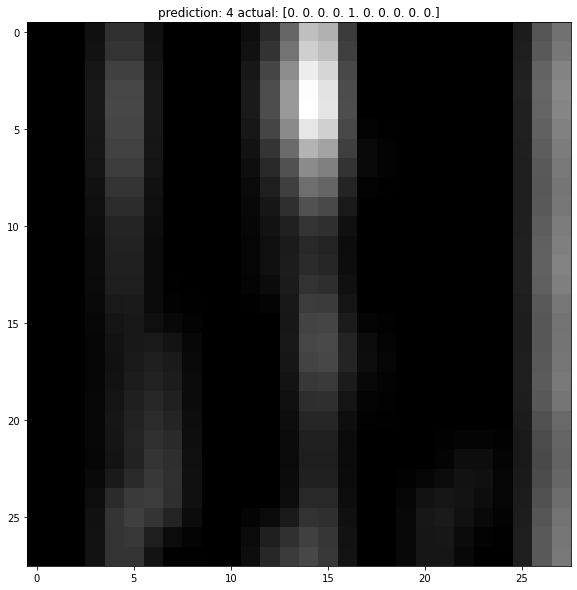

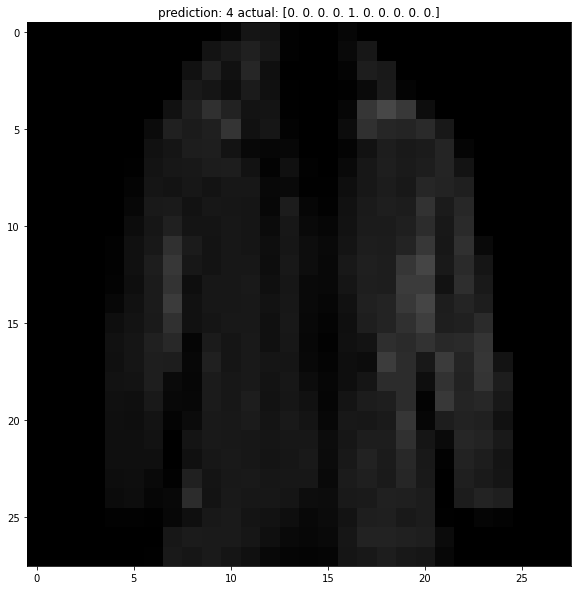

In [58]:
show_grad(model)